B222908

In [256]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from scipy.optimize import fsolve
import string

# Q1 genetic toggle switch

## Q1.1 function

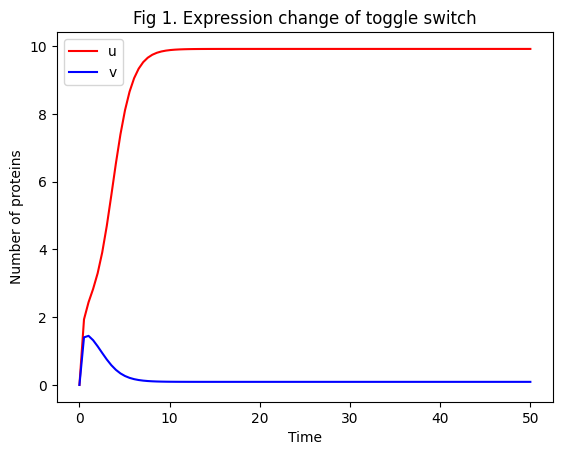

In [257]:
def toggle(y,t,Iu,Iv,au=10,av=9,K=3,b=2,n=2):
    """A ODE function for simulating dynamic of u and v 
    in toggle switch."""
    u,v=y
    dudt=-u+au/(1+(v/(1+Iv/K)**n)**b)
    dvdt=-v+av/(1+(u/(1+Iu/K)**n)**b)
    return np.array([dudt,dvdt])
# a test of function, with no inducers
y=[0,0]
t=np.linspace(0,50,100)
ys=odeint(toggle,y,t,args=(0,0))
plt.figure()
plt.title('Fig 1. Expression change of toggle switch')
plt.plot(t,ys[:,0],'red',t,ys[:,1],'blue')
plt.legend(['u','v'])
plt.xlabel('Time')
plt.ylabel('Number of proteins')
plt.show()

### Answer
The maximum transcription rate of u is higher than that of v, and they have same ability of inhibition to each other. As a result, when the level of [u] becomes high enough to make the expression speed of v lower than its degradation speed, the  level of [v] start to drop until [v]=0 for good, whereas the du/dt reaches equilibrium itself, which makes the level of [u] be stable at the value of 10.

## Q1.2 simulation

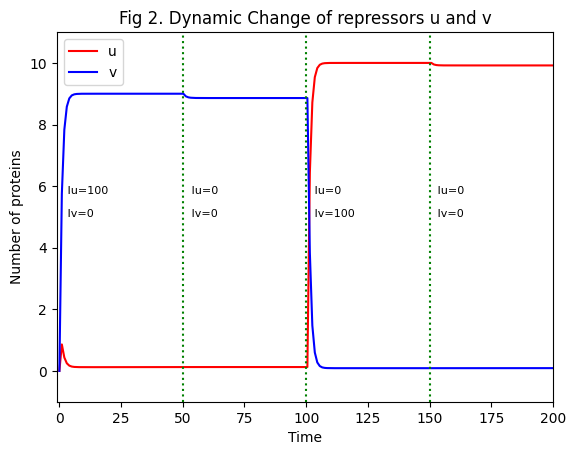

In [258]:
# Simulation with Hill numbers = 2
y=[0,0] # start with u=v=0
t=np.linspace(0,50,50) # 50 time units for each step
# four steps: Iu; remove Iu; Iv; remove Iv
ys1=odeint(toggle,y,t,args=(100,0))
ys2=odeint(toggle,ys1[-1],t,args=(0,0))
ys3=odeint(toggle,ys2[-1],t,args=(0,100))
ys4=odeint(toggle,ys3[-1],t,args=(0,0))
# concatenate the four steps by order
ys_all=np.concatenate((ys1,ys2,ys3,ys4),axis=0)
# 200 time units in total
t_all=np.linspace(0,200,200)
# plot results
plt.figure()
plt.title('Fig 2. Dynamic Change of repressors u and v')
plt.plot(t_all,ys_all[:,0],'red',t_all,ys_all[:,1],'blue')
plt.legend(['u','v'],loc='upper left')
plt.xlabel('Time')
plt.ylabel('Number of proteins')
# vertical line to separate the steps
plt.vlines([50,100,150],-1,11,linestyles ='dotted',color='green')
plt.text(2,5,' Iu=100\n\n Iv=0',fontsize=8)
plt.text(52,5,' Iu=0\n\n Iv=0',fontsize=8)
plt.text(102,5,' Iu=0\n\n Iv=100',fontsize=8)
plt.text(152,5,' Iu=0\n\n Iv=0',fontsize=8)
# set limitation of x and y range
plt.xlim(-1,200)
plt.ylim(-1,11)
plt.show()

### Answer 1
The hysteresis exists in this system because of the positive feedback in the system. After the inducer being removed, the system still remembers the former condition and depends on it. <br>
Starting from u=v=0 with a maximum rate of expression, [u] and [v] increased. With the existence Iu, the u cannot repress v, whereas u can still repress the expression of v. The [v] keep increasing until the degradation rate and expression rate reach to equilibrium. When [v] increase, the expression rate of u becomes lower than its degradation rate, so [u] decreased untill it reached to zero. When the Iu was removed, the expression rate of v reduced a little based on the equation of dv/dt, so [v] decreased untill it reached to new equilibrium. The high level of [v] keeps the u being repressed, so [u] stay as zero. When the Iv was introduced to the system, the repression of v by u is removed, so v stared to express and  repress the expression of u, until [u] reached to zero and the dv/dt equation reached to equilibrium.<br>
Under the positive feedback of repression, the protein that is higher than a threshold and already in a predominant position, it can maintain its dominance, which is called hysteresis.

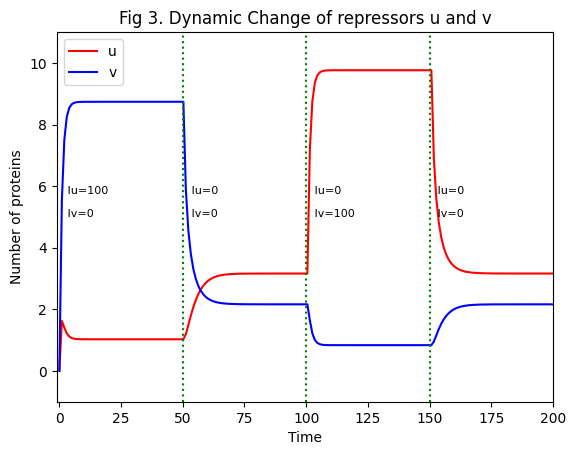

In [259]:
# Simulation with Hill numbers = 1
y=[0,0] ; t=np.linspace(0,50,50) 
# change both hill numbers b and n to 1
ys1=odeint(toggle,y,t,args=(100,0,10,9,3,1,1))
ys2=odeint(toggle,ys1[-1],t,args=(0,0,10,9,3,1,1))
ys3=odeint(toggle,ys2[-1],t,args=(0,100,10,9,3,1,1))
ys4=odeint(toggle,ys3[-1],t,args=(0,0,10,9,3,1,1))
ys_all=np.concatenate((ys1,ys2,ys3,ys4),axis=0)
t_all=np.linspace(0,200,200)
# plot results
plt.figure()
plt.title('Fig 3. Dynamic Change of repressors u and v')
plt.plot(t_all,ys_all[:,0],'red',t_all,ys_all[:,1],'blue')
plt.legend(['u','v'],loc='upper left')
plt.xlabel('Time')
plt.ylabel('Number of proteins')
# vertical line to separate the steps
plt.vlines([50,100,150],-1,11,linestyles ='dotted',color='green')
plt.text(2,5,' Iu=100\n\n Iv=0',fontsize=8)
plt.text(52,5,' Iu=0\n\n Iv=0',fontsize=8)
plt.text(102,5,' Iu=0\n\n Iv=100',fontsize=8)
plt.text(152,5,' Iu=0\n\n Iv=0',fontsize=8)
# set limitation of x and y range
plt.xlim(-1,200)
plt.ylim(-1,11)
plt.show()

### Answer 2
When the hill number b,n = 1, the positive feedback of repression is removed, so it loses the hysteresis. <br>
Compared to the first phase of figure 1, the expression rate of v is lower and the expression rate of u is higher, so it reached to the equilibrium where [u] is higher and [v] is lower. When the Iu is removed, because the [u] is exsist, the expression rate of v dropped and [v] decreased, which makes [u] less repressed and started to increase, till they reach to a new equilibrium. The [v] is lower than [u] at this equilibrium is because $a_u$ is higher than $a_v$, which means [u] is higher than [v] when $du/dt=dv/dt=0$.<br>
When Iv is introduced, the repression of u by v is removed, so [u] increased and v decreased caused by repression from u, till they reached to new equilibrium. when the Iv is removed, the system goes back to the same as phase 2. <br>
There is no history-dependent behaviour here when the hill number equals to 1, which means the repression is not strong enough for the proteins to inhibit each other in a much higher degree than their own expression rate.

## Q1.3 plot the nullclines and trajectories 

In [260]:
# nullcline function
def nullcline(u,Iu=0,Iv=0,au=10,av=9,K=3,b=2,n=2):
    """A function for calculating [v] given [u] in toggle switch. """
    y1=av/(1+(u/(1+Iu/K)**n)**b) # [v] when dv/dt=0
    y2=(au/u-1)**(1/b) * (1+Iv/K)**n # [v] when du/dt=0
    return y1,y2

In [261]:
# find steady states
def steady(u,Iu=0,Iv=0,au=10,av=9,K=3,b=2,n=2):
    """A function for calculating stead state in toggle switch."""
    # use dv/dt=0 to get [v]=f1(u) equation
    # replace [v] to [u] to get du/dt=f(f1(u)) equation
    # return du/dt formula
    return -u+(au/(1+((av/(1+(u/(1+(Iu/K))**n)**b))/(1+(Iv/K))**n)**b))
# fsolve: return the root of the formula, which is [u]
K=3
sol1=fsolve(steady,K/100)[0]
sol2=fsolve(steady,K)[0]
sol3=fsolve(steady,5*K)[0]
print(f'Three fixed points of steady states are at [u] =',
      round(sol1,2),round(sol2,2),round(sol3,2))

Three fixed points of steady states are at [u] = 0.13 1.79 9.92


#### Draw plot with initial conditions for u and v:

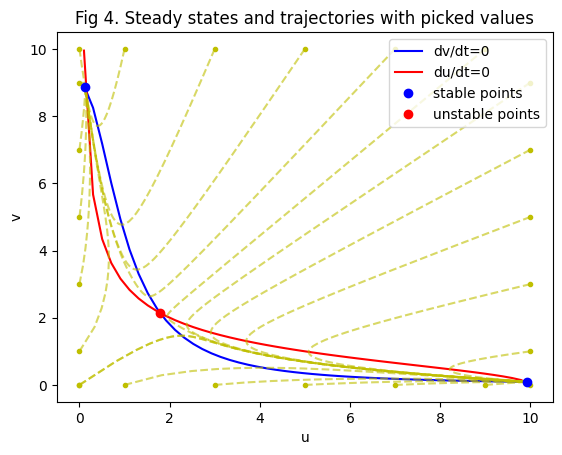

In [262]:
u=np.linspace(0.1,10,50)
y_nu=nullcline(u)
plt.figure()
plt.title('Fig 4. Steady states and trajectories with picked values')
# draw the nullclines
plt.plot(u, y_nu[0], 'b',label='dv/dt=0')
plt.plot(u, y_nu[1], 'r',label='du/dt=0')
# pick 24 initial conditions for u and v for trajectory
x=[0, 1, 3, 5, 7, 9]
y=[10, 10, 10, 10, 10, 10]
z=[0,0,0,0,0,0]
u0=x+y+x+z
v0=y+x+z+x
# draw the trajectory
t1=np.arange(0, 100, 0.1)
for i in range(len(u0)):
    ys=odeint(toggle,[u0[i],v0[i]],t1,args=(0,0))
    plt.plot(ys[:,0][0],ys[:,1][0],'y.')
    plt.plot(ys[:,0],ys[:,1],'y--',alpha=0.6)
# draw the stable points
plt.plot(sol1,nullcline(sol1)[1],"bo",label='stable points')
plt.plot(sol2,nullcline(sol2)[1],"ro",label='unstable points')
plt.plot(sol3,nullcline(sol3)[1],"bo")
plt.legend(loc='upper right')
plt.ylabel('v')
plt.xlabel('u')
plt.show()

#### Instead of picking initial values, we can draw a stream plot:

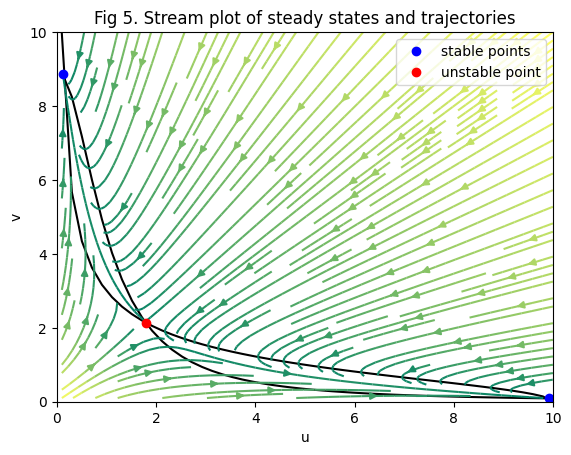

In [263]:
# draw nullclines
plt.figure()
plt.title('Fig 5. Stream plot of steady states and trajectories')
plt.plot(u, y_nu[0], 'k')
plt.plot(u, y_nu[1], 'k')
# draw stream plot
U, V= np.meshgrid(u, u)
dU, dV= toggle([U, V], 0,0,0)
norm= np.sqrt(dU**2 + dV**2)
plt.streamplot(U,V,dU,dV,color= norm,cmap='summer',density= 1.5)
# draw the stable points
plt.plot(sol1,nullcline(sol1)[1],"bo",label='stable points')
plt.plot(sol2,nullcline(sol2)[1],"ro",label='unstable point')
plt.plot(sol3,nullcline(sol3)[1],"bo")
plt.legend(loc='upper right')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('u')
plt.ylabel('v')
plt.show()

### Answer
The two blue points where [u] = 0.13 and [u] = 9.92 are stable, and the red point where [u] = 1.79 is unstable. From the tranjectories, all the tranjectories go towards the blue points eventually, and tranjectories around the red point always move away from it. Points under the line $v = 1.79*u$ will move to the stable point at the right bottom, whereas points that are above the line $v = 1.79*u$ will move to the stable point at the top left. <br> 
If the initial [u] and [v] values are exactly at the red point or on the line of $v = 1.79*u$, it can goes to the red point and stay there, but it will move to one of the two blue points after a tiny perturbation.

## Q1.4 steady state of u with different transcription rate

In [284]:
# au value from 0 to 35
y=[0,0] ; t=np.linspace(0,200,200)
a=list(range(36))
y_ord=[]
for i in a:
    yi=odeint(toggle,y,t,args=(0,0,i,9,3,2,2))
    # check if the final [u] and [v] reach the steady state
    if round(yi[-1][0],3) != round(yi[-2][0],3):
        print(f'Error! au = {i} steap did not reach steady state!')
        break
    else:
        y = yi[-1]
        y_ord.append(yi[-1][0])
# au value from 35 to 0
y=[0,0]
y_rev=[]
a.reverse()
for i in a:
    yi=odeint(toggle,y,t,args=(0,0,i,9,3,2,2))
    # check if the final [u] and [v] reach the steady state
    if round(yi[-1][0],3) != round(yi[-2][0],3):
        print(f'Error! au = {i} step did not reach steady state!')
        break
    else:
        y = yi[-1]
        y_rev.append(yi[-1][0])

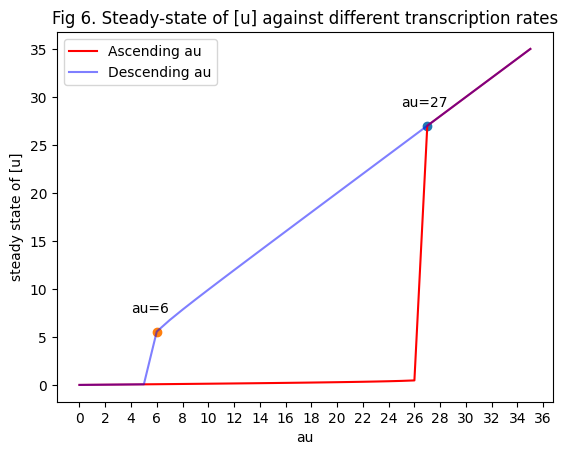

In [286]:
# plot u against au
plt.figure()
plt.title('Fig 6. Steady-state of [u] against different transcription rates')
plt.plot(list(range(36)),y_ord,'r-')
plt.plot(a,y_rev,'b-',alpha=0.5)
# mark the switch point
plt.scatter(27,y_ord[27])
plt.scatter(6,y_rev[29])
plt.text(27-2,y_ord[27]+2,'au=27',fontsize=10)
plt.text(6-2,y_rev[29]+2,'au=6',fontsize=10)
plt.legend(['Ascending au','Descending au'])
plt.xlabel('au')
plt.ylabel('steady state of [u]')
plt.locator_params(axis='x', nbins=20)
plt.show()

### Answer
If the au value starts from 0 and ascends, the system stays 'off' and [u] equals to 0 at the steady state, until it reach to 27 and jump to 'on' state. When it switch to 'on' state, the level of [u] at steady state rises from 0 to more than 25, and stay at 'on' state whenau increase. <br>
When the au starts from a value higher than 27 and descends, it stays at 'on' state  with a high concentration of [u] in the steady system. When au becomes lower than 6, it switch to 'off' state and [u] drops to 0.<br>
The reason for the its history dependent behavior is because if the transcription rate of u is high enough, the concentration of u can quickly reach to a high level and inhibit the expression of v for good, so that [v] would quickly return to 0 and never have change to inhibit expression of v.<br>
By contrast, if the transcription rate of u is lower than a certain value, the level of [v] would take up dominant position, and be able to shut down the expression of u and let [u]=0 for good.<br>
For biological meaning of this mechanism, the cell can recieve a stimulation and rapidly increase the transcription rate to make the system goes to 'on' state. When the stimulation disapears and transcription rate goes back to nomal, the system stays at 'on' state, which is efficent and saves energy.

# Q2 Genetic Oscillator

## Q2.1 why this system has negative feedback?
Negative feedback is a system where the output can inhibit input, resulting in a self-diminishing behavior.<br>
In this system(Fig.7), when the p1 is synthesized, it reduces the transcription rate of p2, so the synthesis rate of p2 decreases. Similarly, p2 reduces the synthesis of p3, and p3 reduces the synthesis of p1. When the expression of p1 is inhibited by p3, the concentration of [p1] drops, which makes p2 expression less inhibited and [p2] starts to increase. Then it causes the level of [p3] to decrease, resulting in p1 less inhibited and [p1] increases. It becomes the same as the beginning and repeats the loops over again.<br>
Because each of the negative feedbacks needs a time of reaction, this delay causes the concentration of p1, p2, p3 keeps moving higher or lower than the steady state, so the purturbation makes the system behaves like oscillation. To be more specific, when [p1] reaches to highest level, synthesis rate of p2 reach to lowest, but because it takes time for protein to sythesize and it takes time for reaction to the inhibition form p1, so after a tiny delay (about 2 unit of time base on the figure 6), the synthesis rate of p2 actually reaches the lowest value. The delay causes the level of [p2] over shoot. The delay and proteins over shoot keeps the system in a constant oscillation.<br>
The level of the vibrations of the oscallator keeps getting smaller at the beginning until it drops to a certain level, as shown in the figure 8. This is also because of the time delay in the beginning, where no inhibition for p3 exists, which makes [p3] get the chance to increase and reach to a higher concentration, and drop slighly each time of the inhibition happens, until the system gets to a constant range of vibration.<br>
Here(Fig.9), the hill number of the dm/dt equations is 2, so the cascade effect makes the change of their expression rates dramaticaly, so we see the vibration. If we change the hill number to 1, the effect of inhibition won't make the concentration change faster than it reach the equilibriums, so the oscillation cannot been seen. On the contrary, if the hill number changes to higher value, the vibration will become more extreme.

In [268]:
 def Oscillator(y,t,a=14,b=10,n=2):
    """A ODE function for simulating dynamic change of oscillator"""
    m1,m2,m3,p1,p2,p3=y
    dydt=[0,0,0,0,0,0]
    dydt[0]=-m1+a/(1+p3**n)
    dydt[3]=-b*(p1-m1)
    dydt[1]=-m2+a/(1+p1**n)
    dydt[4]=-b*(p2-m2)
    dydt[2]=-m3+a/(1+p2**n)
    dydt[5]=-b*(p3-m3)
    return dydt

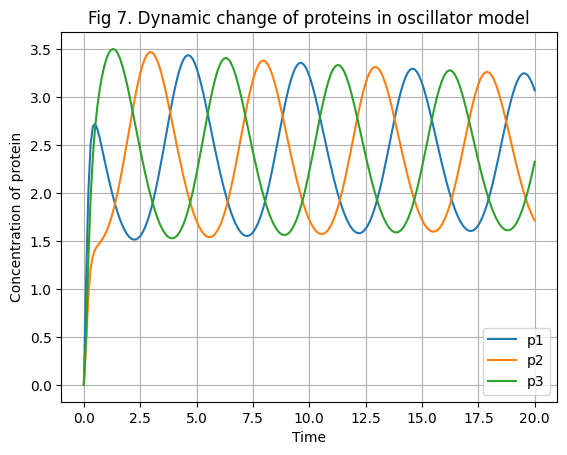

In [273]:
# Oscillator behavior at the beginning
t=np.linspace(0,20,200)
y=[1,0,0,0,0,0]
yosc=odeint(Oscillator,y,t) 
plt.figure()
plt.title('Fig 7. Dynamic change of proteins in oscillator model')
# plot the level of [p1],[p2],[p3]
plt.plot(t,yosc[:,3],t,yosc[:,4],t,yosc[:,5]) 
plt.legend(['p1','p2','p3'])
plt.xlabel('Time')
plt.ylabel('Concentration of protein')
plt.grid()
plt.show()

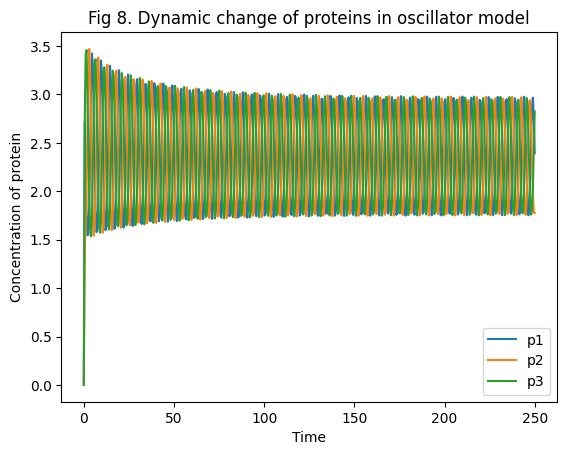

In [274]:
# Oscillator behavior for long period
t=np.linspace(0,250,500)
y=[1,0,0,0,0,0]
yosc=odeint(Oscillator,y,t) 
plt.figure()
plt.title('Fig 8. Dynamic change of proteins in oscillator model')
# level of [p1],[p2],[p3]
plt.plot(t,yosc[:,3],t,yosc[:,4],t,yosc[:,5]) 
plt.legend(['p1','p2','p3'])
plt.xlabel('Time')
plt.ylabel('Concentration of protein')
plt.show()

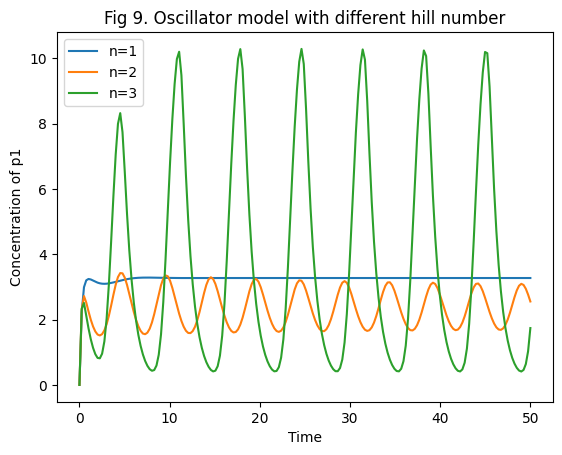

In [275]:
# Comarison of hill number in oscillator model
t=np.linspace(0,50,200)
y=[1,0,0,0,0,0]
# run the function three times with hill number of 1,2,3 respectively
y_osc_1=odeint(Oscillator,y,t,args=(14,10,1)) 
y_osc_2=odeint(Oscillator,y,t,args=(14,10,2)) 
y_osc_3=odeint(Oscillator,y,t,args=(14,10,3)) 
plt.figure()
plt.title('Fig 9. Oscillator model with different hill number')
plt.plot(t,y_osc_1[:,3],t,y_osc_2[:,3],t,y_osc_3[:,3]) #level of [p1]
plt.legend(['n=1','n=2','n=3'])
plt.xlabel('Time')
plt.ylabel('Concentration of p1')
plt.show()

## Q2.2 Fix b = 10 and a from 14 to higher

<Figure size 640x480 with 0 Axes>

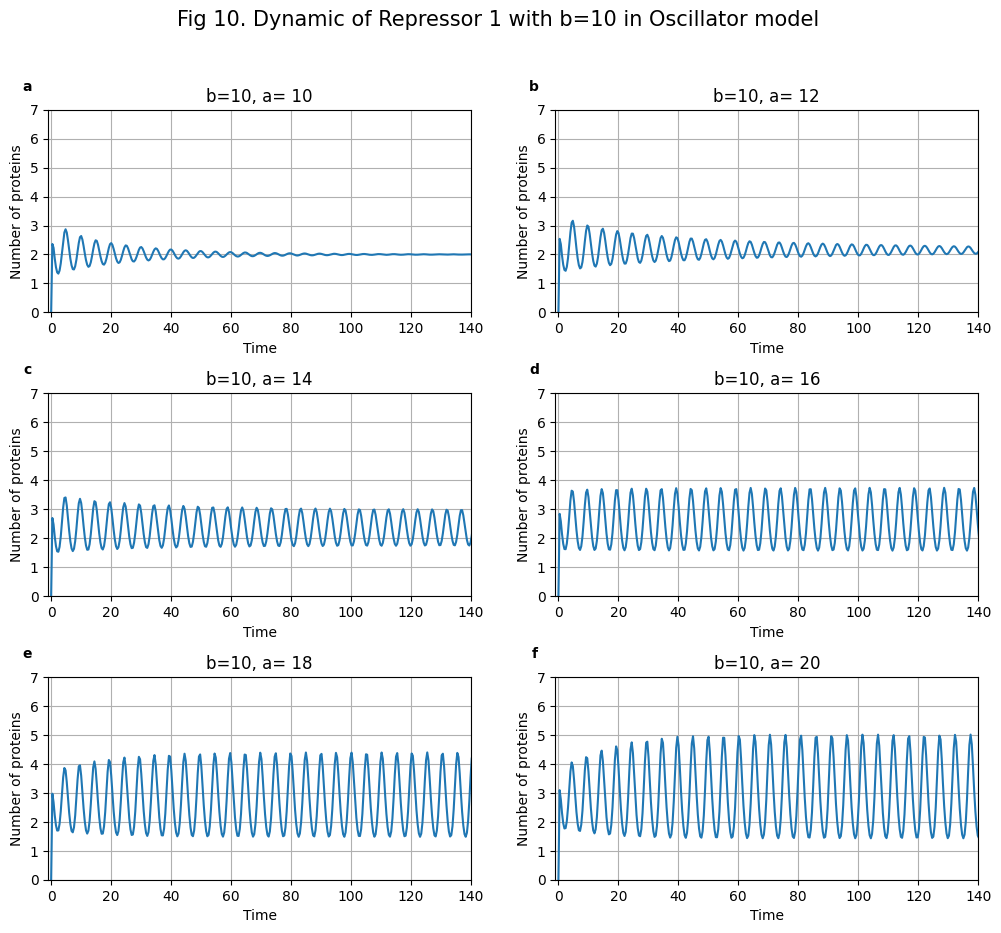

In [277]:
t=np.linspace(0,200,500)
y=[1,0,0,0,0,0]
para_a=10 # start from 10 to 20
plt.figure()
fig, axs = plt.subplots(3,2,figsize=(12,10)) # 6 subplots
# super title
fig.suptitle('Fig 10. Dynamic of Repressor 1 with b=10 in Oscillator model',
             fontsize=15)
for i, subfig in enumerate(axs.flatten()):
    y_osc=odeint(Oscillator,y,t,args=(para_a+2*i,10)) 
    subfig.plot(t,y_osc[:,3]) # repressor 1
    subfig.text(-0.05, 1.15, string.ascii_lowercase[i], 
                transform=subfig.transAxes, fontweight='bold',
                horizontalalignment='center', verticalalignment='top')
    subfig.set_title(f'b=10, a= {para_a+2*i}')
    subfig.set_xlabel('Time')
    subfig.set_ylabel('Number of proteins')
    subfig.set_ylim([0,7])
    subfig.set_xlim([-1,140])
    subfig.grid()
plt.subplots_adjust(hspace=0.4)
plt.show()

### Answer
When the maximum transcription rate is low, the system is able to get closer to steady state in each loop, and finally reach to steady state. If  **a** is big, then it leads to oscillation<br>
As the value of **a** increase, the vibration range of protein increases. This is because in the same period of time, the model with higher synthesis rate of proteins makes the concentration of proteins increases even faster, meaning a more extreme effect of delay in this system. <br>
The period of oscillation time is the same in each plot is because the time for synthesis rate reacting to the inhibition is the same.

## Q2.3  Bifurcation Diagram

In [279]:
t=np.linspace(0,200,200)
y=[1,0,0,0,0,0]
# a b values
a= np.logspace(0,3,100)
b= np.logspace(-1,3,100)
# form a len(a)*len(b) matrix
Z=[]
# run through each grid in matrix (100*100 times)
for j in b:
    for i in a:
        p3=odeint(Oscillator,y,t,args=(i,j))[-5:,5]
        # sum up the differences of last 5 states
        diff=np.sum(np.absolute(np.diff(p3))) 
        if diff<0.05: # steady state
            Z.append(0)
        else: # oscillation state
            Z.append(1)

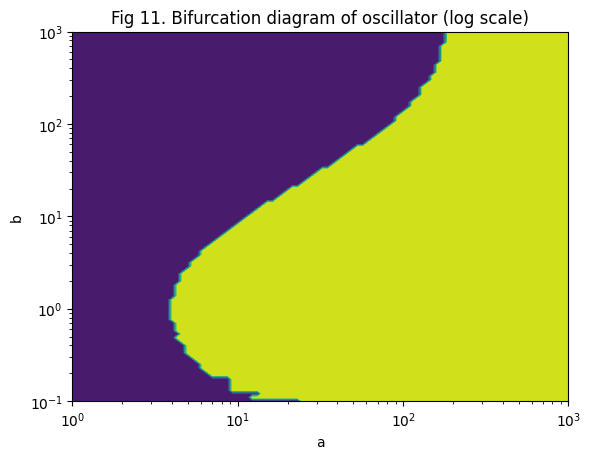

In [281]:
# log scale for x axis and y axis
zmat=np.array(Z).reshape(100,100)
plt.figure()
cs = plt.contourf(a, b, zmat)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Fig 11. Bifurcation diagram of oscillator (log scale)')
plt.show()

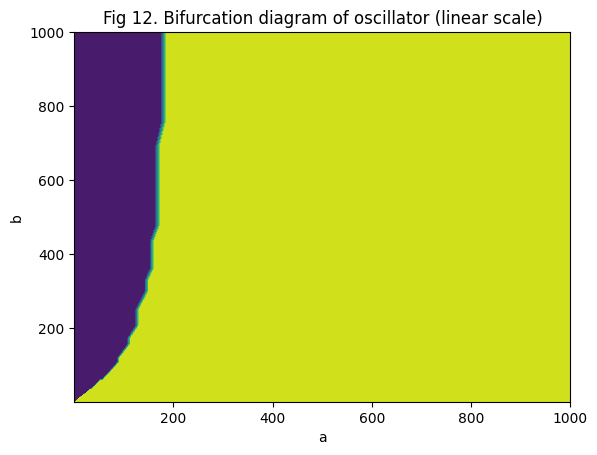

In [282]:
# linear scale for x axis and y axis
plt.figure()
cs = plt.contourf(a, b, zmat)
plt.xlabel('a')
plt.ylabel('b')
plt.title('Fig 12. Bifurcation diagram of oscillator (linear scale)')
plt.show()

### Answer
The **b** decides the lifetime of protein. If **b** is large, the protein degrades and the effect of inhibition to the next protein will disappear very fast, and the concentration change of next protein won't even have enough time to strongly react to it. Thus, instead of overshooting, the transcription rate and degradation rate can get to equilibrium for a short amount of time in every cycle, which makes the system get closer to equilibrium everytime and reduce the degree of purturbation, until the system becomes stable.<br>
When **a** is large, the effect of delay becomes big, which cause overshooting of mRNA and protein levels, and purtubate the system making it oscillate.<br>
The effect of **a** is bigger than the effect of **b**. This is because if the maximum transcription rate is big, the inhibition from former protein cannot counteract the large delay in the system, leading to oscillation. However, when  **a** and **b** are both very large, the system can still overshoot before the inhibition fades, so the system can still be oscillation.<br>